<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/13_6_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [ ]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

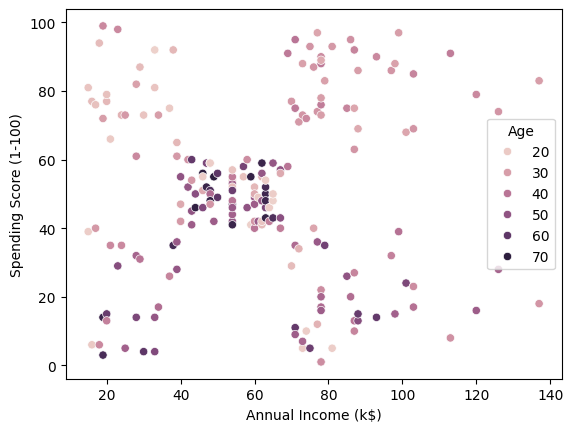

In [ ]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Age')

На графике можно заметить 5 кластеров, но не получается определить, что влияет на кластеры

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

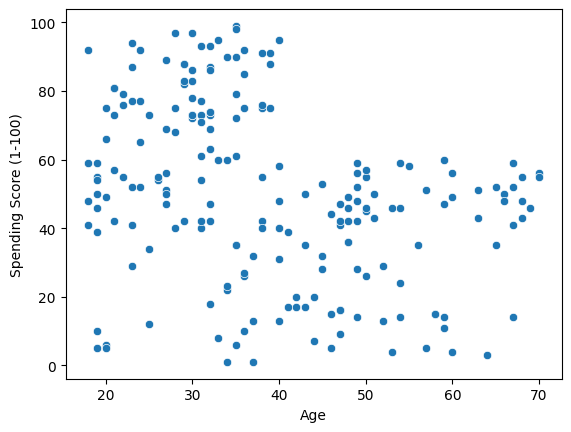

In [ ]:
sns.scatterplot(df, x='Age', y='Spending Score (1-100)')

Есть 2 кластера age- spending_score

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

На графиках можно заметить 5 кластеров

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

Пусть будем использвать labels. Male = 1, Female = 0. Если использовать ohe, то надо будет удалять 1 столбец в итоге получится тоже самое.

In [ ]:
df['Genre_Male'] = 1
df.loc[df['Genre']=='Female', 'Genre_Male'] = 0
df['Genre'] = df['Genre_Male']
df = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

<Axes: >

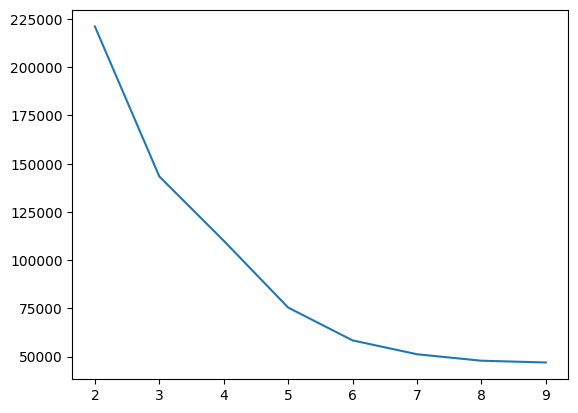

In [ ]:
n_clusters = list(range(2, 10))
metrics = []
x = df.copy()
for k in n_clusters:
  km = KMeans(n_clusters=k).fit(x)
  metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)


По графику оптимальное количетсво кластеров 6 или 7

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [ ]:
km = KMeans(n_clusters=7).fit(x)

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы.

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)).

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.